In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Load Data ---
employees = pd.read_csv("../data/employees.csv")
performance = pd.read_csv("../data/performance_metrics.csv")


# Check missing value for employees and performance

/var/folders/y_/51s762l96md64s3q6nr4g3pw0000gn/T/ipykernel_980/1311466765.py:20: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
/Users/Shared/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


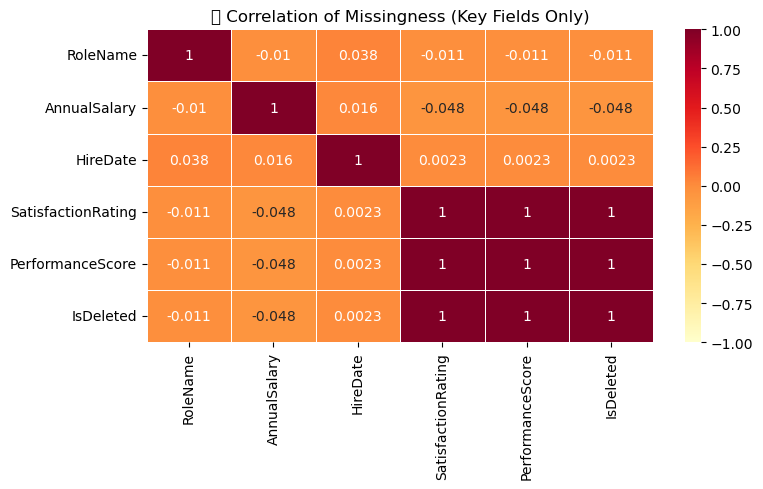

In [102]:
# Replace blank strings with NA
employees.replace(r'^\s*$', pd.NA, regex=True, inplace=True)

# Merge on EmployeeID
merged_df = employees.merge(performance, on='EmployeeID', how='left')

# Focus on columns likely to have missing values
cols_to_check = ['RoleName', 'AnnualSalary', 'HireDate', 'SatisfactionRating', 'PerformanceScore', 'IsDeleted']

# Boolean mask of missing values
missing_bool = merged_df[cols_to_check].isna()

# Compute correlation of missingness
missing_corr = missing_bool.corr()

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(missing_corr, annot=True, cmap='YlOrRd', linewidths=0.5, vmin=-1, vmax=1)
plt.title("🔍 Correlation of Missingness (Key Fields Only)")
plt.tight_layout()
plt.show()


# Check missing value for employees

🔍 Missing Value Count per Column:

EmployeeID          0
DepartmentID        0
DepartmentName      0
RoleName          188
AnnualSalary      132
HireDate           73
dtype: int64

🔗 Conditional Missingness:
- Total missing RoleName: 188
- Total missing HireDate: 73
- Rows where BOTH RoleName AND HireDate are missing: 15


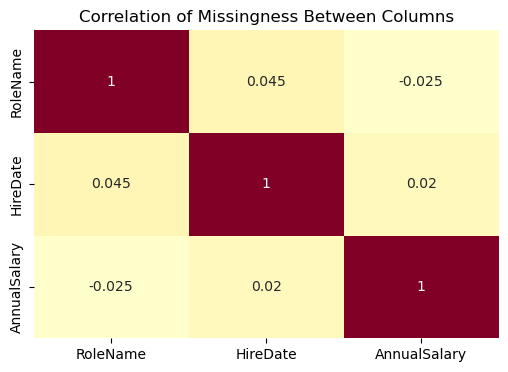


📊 Missingness Combinations:
    RoleName_Missing  HireDate_Missing  Count
0             False             False   1099
1             False              True     58
2              True             False    173
3              True              True     15


In [ ]:
# --- Helper: Convert blanks to NaN ---
employees.replace(r'^\s*$', pd.NA, regex=True, inplace=True)

# --- Total Missing by Column ---
missing_counts = employees.isna().sum()
print("🔍 Missing Value Count per Column:\n")
print(missing_counts)

# --- Dependent Missingness Example ---
# Count how many rows where BOTH RoleName and HireDate are missing
cond_missing = employees[employees['RoleName'].isna() & employees['HireDate'].isna()].shape[0]
total_role_missing = employees['RoleName'].isna().sum()
total_hire_missing = employees['HireDate'].isna().sum()

print(f"\n🔗 Conditional Missingness:")
print(f"- Total missing RoleName: {total_role_missing}")
print(f"- Total missing HireDate: {total_hire_missing}")
print(f"- Rows where BOTH RoleName AND HireDate are missing: {cond_missing}")

# --- Visual: Conditional Missingness Matrix (Heatmap) ---
import seaborn as sns
import matplotlib.pyplot as plt

# Create boolean DataFrame for missingness
missing_bool_df = employees[['RoleName', 'HireDate', 'AnnualSalary']].isna()

plt.figure(figsize=(6, 4))
sns.heatmap(missing_bool_df.corr(), annot=True, cmap="YlOrRd", cbar=False)
plt.title("Correlation of Missingness Between Columns")
plt.show()

# --- Count combos of missing/not missing ---
combo_counts = employees[['RoleName', 'HireDate']].isna().groupby(['RoleName', 'HireDate']).size().reset_index(name='count')
combo_counts.columns = ['RoleName_Missing', 'HireDate_Missing', 'Count']
print("\n📊 Missingness Combinations:\n", combo_counts)


# Check Missing values for role name


🕳 Missing RoleName count: 188


/Users/Shared/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Shared/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Shared/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


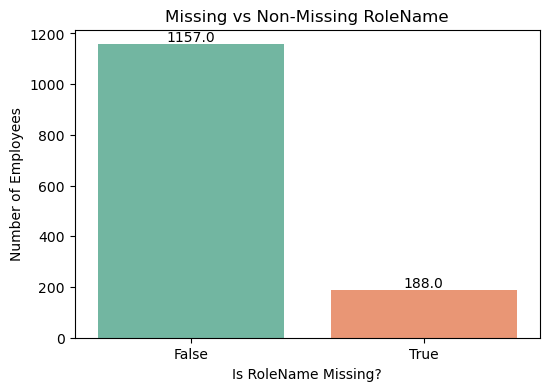

In [104]:
# --- 1. Missing RoleName ---
employees['RoleName_Missing'] = employees['RoleName'].isna()
missing_rolename_count = employees['RoleName_Missing'].sum()
print(f"\n🕳 Missing RoleName count: {missing_rolename_count}")

# Visual: RoleName Missing Count
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=employees, x='RoleName_Missing', palette='Set2')
plt.title('Missing vs Non-Missing RoleName')
plt.xlabel('Is RoleName Missing?')
plt.ylabel('Number of Employees')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')
plt.show()



# Inconsistent Role Name

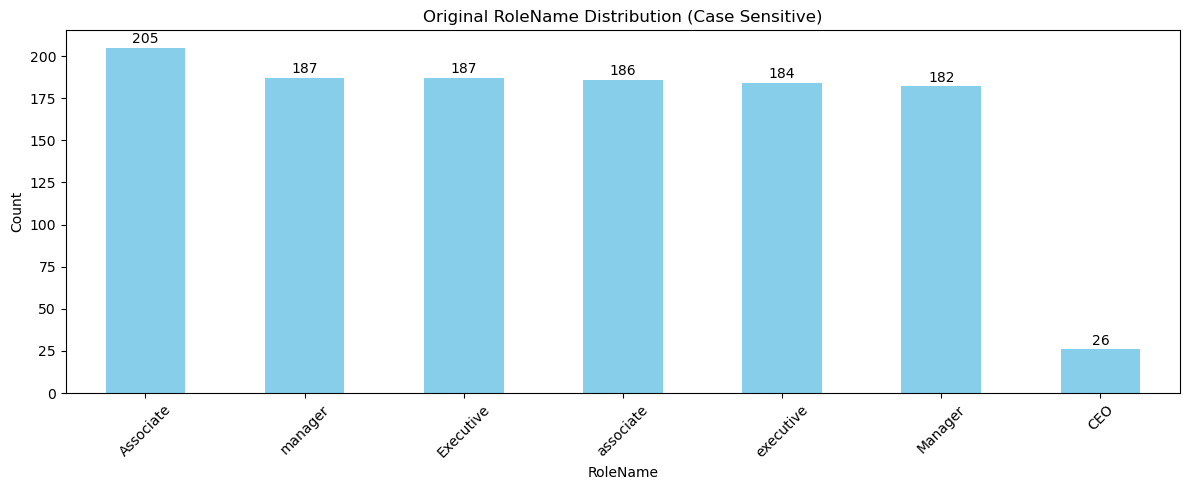

In [105]:
# --- 2. Inconsistent RoleName Text (Case) ---
role_counts = employees['RoleName'].dropna().value_counts()
role_counts_casefold = employees['RoleName'].dropna().str.lower().value_counts()

# Visual: Original RoleName Distribution (case-sensitive)
plt.figure(figsize=(12, 5))
ax = role_counts.plot(kind='bar', color='skyblue')
plt.title('Original RoleName Distribution (Case Sensitive)')
plt.ylabel('Count')
plt.xticks(rotation=45)
for i, v in enumerate(role_counts):
    ax.text(i, v + 1, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()





# Case Insensitive Role Name

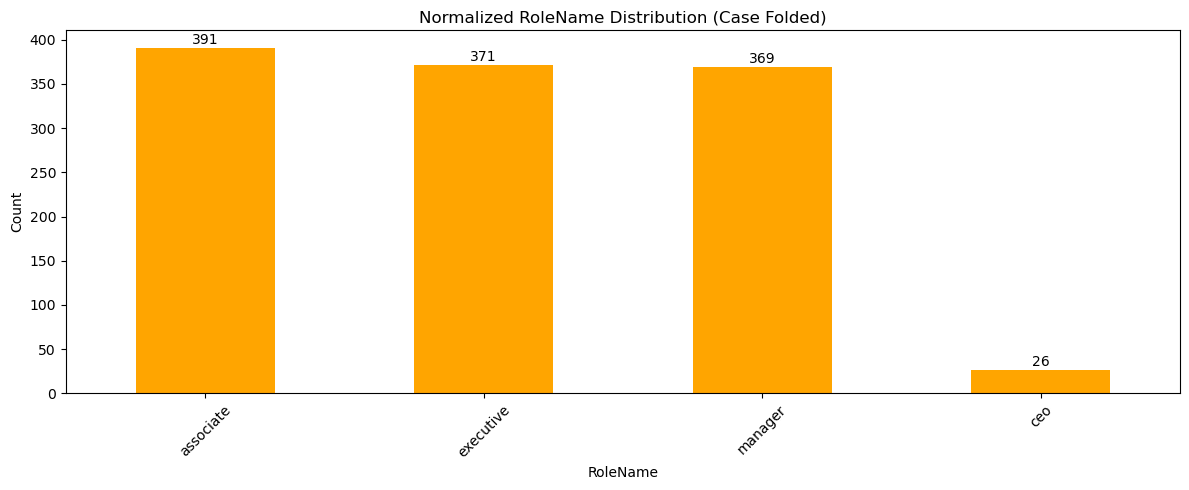

In [106]:
# Visual: Case-insensitive RoleName Distribution
plt.figure(figsize=(12, 5))
ax = role_counts_casefold.plot(kind='bar', color='orange')
plt.title('Normalized RoleName Distribution (Case Folded)')
plt.ylabel('Count')
plt.xticks(rotation=45)
for i, v in enumerate(role_counts_casefold):
    ax.text(i, v + 1, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Weird Number in Annual Salary


💰 AnnualSalary Stats:
count      1213.000000
mean      61184.728772
std       69435.215674
min         -99.000000
25%       39100.000000
50%       51120.000000
75%       69904.000000
max      522179.000000
Name: AnnualSalary, dtype: float64


/Users/Shared/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Shared/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


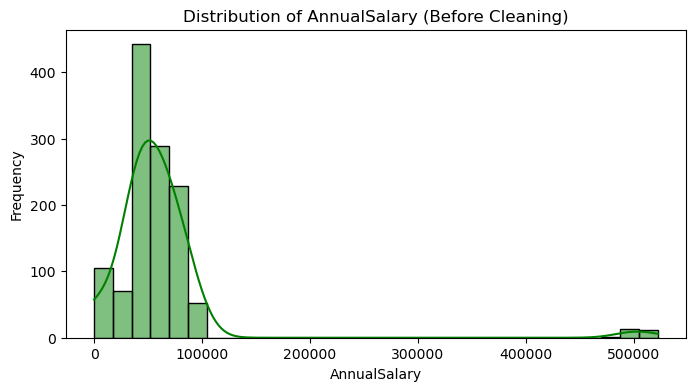

In [107]:
# --- 3. AnnualSalary Analysis ---
print("\n💰 AnnualSalary Stats:")
print(df['AnnualSalary'].describe())

plt.figure(figsize=(8, 4))
sns.histplot(df['AnnualSalary'], bins=30, kde=True, color='green')
plt.title('Distribution of AnnualSalary (Before Cleaning)')
plt.xlabel('AnnualSalary')
plt.ylabel('Frequency')
plt.show()

### Data issue checklist: 
1. Missing data with dependent (Exist but not significant, no need to solve)
2. Missing data for employee columns (RoleName, AnnualSalary,HireDate)
3. Inconsistent Role Name ( ["Associate" , associate], ["Executive" , "executive" , "ceo"], ["Manager" , "Manager"] )
4. Negative Annual Salary, Salary too low (1213)

# Solving for "Inconsistent Role Name"

In [ ]:
# Show unique RoleName values BEFORE cleaning
print("🟡 Unique RoleName values BEFORE cleaning:")
print(employees['RoleName'].dropna().unique())

# --- Clean: Normalize text and map manually ---
employees['RoleName'] = employees['RoleName'].replace(r'^\s*$', pd.NA, regex=True)  # Blank → NA
employees['RoleName'] = employees['RoleName'].str.strip().str.lower()  # Lowercase + remove extra spaces

# Map roles
role_map = {
    'ceo': 'Executive',
    'executive': 'Executive',
    'associate': 'Associate',
    'manager': 'Manager'
}
employees['RoleName'] = employees['RoleName'].map(role_map)

# Show unique RoleName values AFTER cleaning
print("\n🟢 Unique RoleName values AFTER cleaning:")
print(employees['RoleName'].dropna().unique())

# Count distribution
print("\n🔢 Count per Role AFTER cleaning:")
print(employees['RoleName'].value_counts(dropna=False))

🟡 Unique RoleName values BEFORE cleaning:
['executive' 'associate' 'manager' 'Manager' 'Associate' 'Executive' 'CEO']

🟢 Unique RoleName values AFTER cleaning:
['Executive' 'Associate' 'Manager']

🔢 Count per Role AFTER cleaning:
RoleName
Executive    397
Associate    391
Manager      369
NaN          188
Name: count, dtype: int64


# Solving for Rolename Missing Data

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd

before_missing = employees['RoleName'].isna().sum()
print(f"❌ Missing RoleName BEFORE: {before_missing}")

# Encode DepartmentName
dept_encoder = LabelEncoder()
employees['DeptEncoded'] = dept_encoder.fit_transform(employees['DepartmentName'].astype(str))

# Prepare train and test sets
train = employees[employees['RoleName'].notna()].copy()
test = employees[employees['RoleName'].isna()].copy()

# Drop rows from training where salary is missing
train = train.dropna(subset=['AnnualSalary'])

# Encode RoleName for model target
role_encoder = LabelEncoder()
train['RoleEncoded'] = role_encoder.fit_transform(train['RoleName'])

# Fit classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(train[['AnnualSalary', 'DeptEncoded']], train['RoleEncoded'])

# Drop test rows with missing predictors
test_features = test[['AnnualSalary', 'DeptEncoded']].copy().dropna()
predicted_roles = clf.predict(test_features)
decoded_roles = role_encoder.inverse_transform(predicted_roles)

# Fill predicted RoleName
employees.loc[test_features.index, 'RoleName'] = decoded_roles

# Final cleanup: remove rows still missing RoleName
final_missing = employees['RoleName'].isna().sum()
print(f"⚠️ Still missing RoleName: {final_missing} → dropping them...")

# Drop remaining missing values
employees = employees[employees['RoleName'].notna()].copy()

# Confirm
print(f"✅ Final missing RoleName: {employees['RoleName'].isna().sum()}")


❌ Missing RoleName BEFORE: 188
⚠️ Still missing RoleName: 15 → dropping them...
✅ Final missing RoleName: 0


/Users/Shared/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Shared/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Shared/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Shared/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

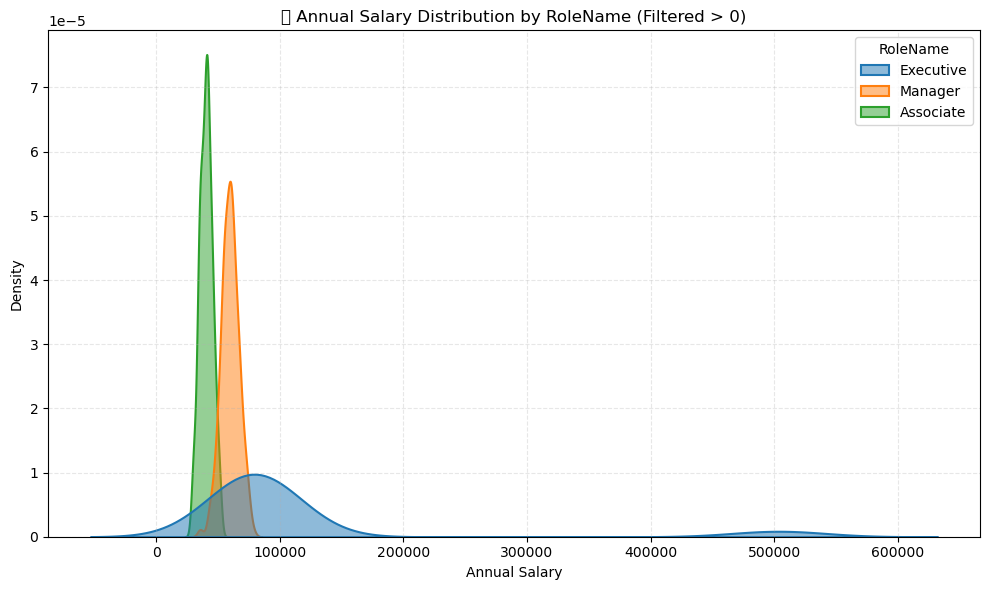

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter valid RoleName and positive salary only
plot_df = employees[
    (employees['RoleName'].notna()) &
    (employees['AnnualSalary'].notna()) &
    (employees['AnnualSalary'] > 0)
]

# Plot cleaned KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=plot_df,
    x="AnnualSalary",
    hue="RoleName",
    fill=True,
    common_norm=False,
    alpha=0.5,
    linewidth=1.5
)
plt.title("💰 Annual Salary Distribution by RoleName (Filtered > 0)")
plt.xlabel("Annual Salary")
plt.ylabel("Density")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


# Solving for Annual Salary

In [111]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Copy the DataFrame
employees = employees.copy()

# Step 1: Remove negative salary
negative_count = (employees['AnnualSalary'] < 0).sum()
print(f"🗑 Removing {negative_count} rows with negative salary...")
employees = employees[~(employees['AnnualSalary'] < 0)].copy()

# Step 2: Replace 0 salaries with NaN (considered as missing)
zero_count = (employees['AnnualSalary'] == 0).sum()
print(f"🔄 Treating {zero_count} zero salaries as missing...")
employees.loc[employees['AnnualSalary'] == 0, 'AnnualSalary'] = pd.NA

# Step 3: Show how many missing
missing_before = employees['AnnualSalary'].isna().sum()
print(f"❌ Missing AnnualSalary BEFORE: {missing_before}")

# Step 4: Prepare training and test datasets
train = employees.dropna(subset=['AnnualSalary', 'RoleName', 'DepartmentName']).copy()
test = employees[employees['AnnualSalary'].isna()].copy()

# Step 5: Encode categorical features
dept_encoder = LabelEncoder()
role_encoder = LabelEncoder()

train['DeptEncoded'] = dept_encoder.fit_transform(train['DepartmentName'])
train['RoleEncoded'] = role_encoder.fit_transform(train['RoleName'])

# Step 6: Train model
reg = RandomForestRegressor(random_state=42)
reg.fit(train[['DeptEncoded', 'RoleEncoded']], train['AnnualSalary'])

# Step 7: Prepare test set
test['DeptEncoded'] = dept_encoder.transform(test['DepartmentName'])
test['RoleEncoded'] = role_encoder.transform(test['RoleName'])

# Step 8: Predict missing values
predicted_salaries = reg.predict(test[['DeptEncoded', 'RoleEncoded']])

# Step 9: Impute the missing/zero salaries
employees.loc[test.index, 'AnnualSalary'] = predicted_salaries

# Step 10: Report after imputation
missing_after = employees['AnnualSalary'].isna().sum()
print(f"✅ Missing AnnualSalary AFTER: {missing_after}")


🗑 Removing 14 rows with negative salary...
🔄 Treating 91 zero salaries as missing...
❌ Missing AnnualSalary BEFORE: 208
✅ Missing AnnualSalary AFTER: 0


In [ ]:
from tabulate import tabulate
import pandas as pd

# Title
print("📊 AnnualSalary Descriptive Summary (Before vs After Imputation)\n")

# Format and display
print(tabulate(summary_df, headers="keys", tablefmt="github", stralign="right"))


📊 AnnualSalary Descriptive Summary (Before vs After Imputation)

|       |   Before Imputation |   After Imputation |   % Change |
|-------|---------------------|--------------------|------------|
| count |              1199   |             1316   |   🔺 9.76% |
|  mean |             61900.3 |            62272.2 |   🔺 0.60% |
|   std |             69521.1 |            66883.9 |  🔻 -3.79% |
|   min |                 0   |                0   |            |
|   25% |             39479   |            39267.8 |  🔻 -0.54% |
|   50% |             51620   |            52196   |   🔺 1.12% |
|   75% |             70388.5 |            71365.5 |   🔺 1.39% |
|   max |            522179   |           522179   |   ➖ 0.00% |


In [ ]:
import pandas as pd

# Load dataset
salary_df = pd.read_csv("../data/employees.csv") 

# Snapshot before imputation
before_impute_df = salary_df.copy()
before_impute_df.replace(r'^\s*$', pd.NA, regex=True, inplace=True)
before_impute_df = before_impute_df[~(before_impute_df['AnnualSalary'] < 0)]

before_summary = before_impute_df['AnnualSalary'].describe().to_frame(name='Before Imputation')

# Cleaned/imputed version
employees = employees[~(employees['AnnualSalary'] < 0)].copy()
after_summary = employees['AnnualSalary'].describe().to_frame(name='After Imputation')

# Compute % difference
percentage_diff = ((after_summary['After Imputation'] - before_summary['Before Imputation']) / before_summary['Before Imputation']) * 100
percentage_diff = percentage_diff.to_frame(name='% Change')

# Add trend icon
def format_change_icon(pct):
    if pd.isna(pct):
        return ""
    return f"🔺 {pct:.2f}%" if pct > 0 else f"🔻 {pct:.2f}%" if pct < 0 else "➖ 0.00%"

percentage_diff['% Change'] = percentage_diff['% Change'].apply(format_change_icon)

# Merge all
summary_df = pd.concat([before_summary, after_summary, percentage_diff], axis=1)

# pretty print 
from tabulate import tabulate
print(tabulate(summary_df, headers='keys', tablefmt='github', stralign='right'))


|       |   Before Imputation |   After Imputation |   % Change |
|-------|---------------------|--------------------|------------|
| count |              1199   |             1316   |   🔺 9.76% |
|  mean |             61900.3 |            67940.9 |   🔺 9.76% |
|   std |             69521.1 |            65306.5 |  🔻 -6.06% |
|   min |                 0   |            27832   |    🔺 inf% |
|   25% |             39479   |            41156.2 |   🔺 4.25% |
|   50% |             51620   |            57611.5 |  🔺 11.61% |
|   75% |             70388.5 |            74378   |   🔺 5.67% |
|   max |            522179   |           522179   |   ➖ 0.00% |


# Solving for HireDate

In [114]:
import pandas as pd

# Step 1: Add a flag column to track imputed rows
employees['HireDateMissing'] = employees['HireDate'].isna()

# Convert to datetime if not already
employees['HireDate'] = pd.to_datetime(employees['HireDate'], errors='coerce')

# Step 2: Impute missing HireDate using median per RoleName
role_median_hire_dates = employees.groupby('RoleName')['HireDate'].transform(lambda x: x.median())
employees['HireDate'] = employees['HireDate'].fillna(role_median_hire_dates)

# Check how many were imputed
imputed_count = employees['HireDateMissing'].sum()
print(f"📌 HireDate imputed for {imputed_count} employees.")


📌 HireDate imputed for 73 employees.


/Users/Shared/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Shared/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Shared/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Shared/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

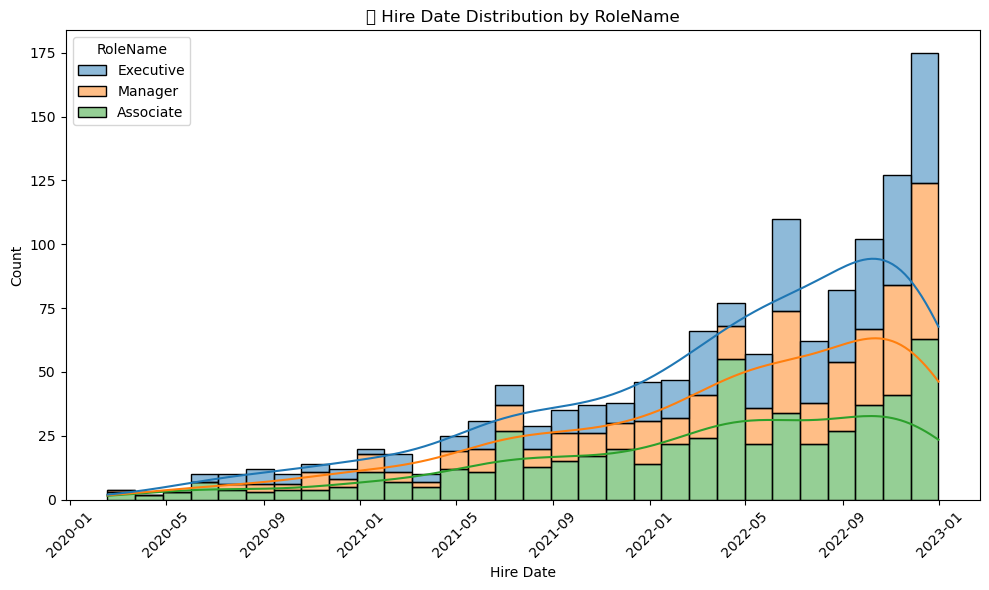

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=employees, x='HireDate', hue='RoleName', bins=30, kde=True, multiple='stack')
plt.title("📅 Hire Date Distribution by RoleName")
plt.xlabel("Hire Date")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/y_/51s762l96md64s3q6nr4g3pw0000gn/T/ipykernel_980/2756694140.py:3: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from current font.
  plt.tight_layout()
/Users/Shared/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


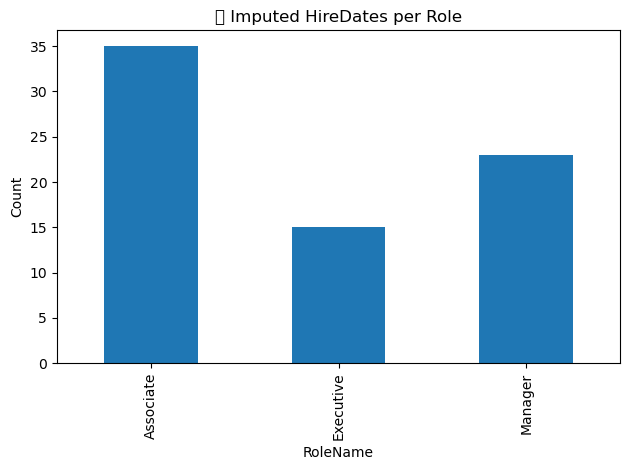

In [116]:
imputed_by_role = employees[employees['HireDateMissing']].groupby('RoleName').size()
imputed_by_role.plot(kind='bar', title='📌 Imputed HireDates per Role', ylabel='Count', xlabel='RoleName')
plt.tight_layout()
plt.show()


In [117]:
employees

,EmployeeID,DepartmentID,DepartmentName,RoleName,AnnualSalary,HireDate,RoleName_Missing,DeptEncoded,HireDateMissing
0,1,5,Operations,Executive,71699.000000,2022-12-31,False,3,False
1,2,1,Sales,Manager,51213.000000,2022-12-31,True,4,False
2,3,3,Finance,Associate,44046.000000,2022-12-30,False,0,False
3,4,2,Marketing,Manager,50406.000000,2022-12-30,False,2,False
4,5,2,Marketing,Executive,77449.000000,2022-12-30,False,2,False
...,...,...,...,...,...,...,...,...,...
1340,1341,4,Human Resources,Associate,39589.532182,2021-12-11,False,1,False
1341,1342,3,Finance,Associate,44170.000000,2021-06-13,False,0,False
1342,1343,4,Human Resources,Manager,59758.390309,2022-10-13,False,1,False
1343,1344,5,Operations,Associate,42755.000000,2021-09-26,False,3,False


In [ ]:
import pandas as pd

# Check 1: Missing values
print("\n🔍 Missing Values Check:")
print(employees[['EmployeeID', 'DepartmentID', 'DepartmentName', 'RoleName', 'AnnualSalary', 'HireDate']].isna().sum())

# Check 2: Abnormal values in AnnualSalary (<= 0)
abnormal_salary = employees[employees['AnnualSalary'] <= 0]
print(f"\n🚨 Abnormal AnnualSalary (<= 0): {len(abnormal_salary)} rows")
print(abnormal_salary[['EmployeeID', 'AnnualSalary']].head())

# Check 3: Inconsistent RoleName (case-sensitive uniqueness)
unique_roles = employees['RoleName'].dropna().unique()
print(f"\n🎭 Unique Role Names (case-sensitive): {unique_roles}")

# Optional: check for inconsistent DepartmentName as well
unique_departments = employees['DepartmentName'].dropna().unique()
print(f"\n🏢 Unique Department Names: {unique_departments}")

# Final filtered dataframe
final_df = employees[['EmployeeID', 'DepartmentID', 'DepartmentName', 'RoleName', 'AnnualSalary', 'HireDate']].copy()

# Export to CSV
final_df.to_csv("cleaned_employees.csv", index=False)
print("\n✅ Exported filtered data to employee_clean_checklist.csv")



🔍 Missing Values Check:
EmployeeID        0
DepartmentID      0
DepartmentName    0
RoleName          0
AnnualSalary      0
HireDate          0
dtype: int64

🚨 Abnormal AnnualSalary (<= 0): 0 rows
Empty DataFrame
Columns: [EmployeeID, AnnualSalary]
Index: []

🎭 Unique Role Names (case-sensitive): ['Executive' 'Manager' 'Associate']

🏢 Unique Department Names: ['Operations' 'Sales' 'Finance' 'Marketing' 'Human Resources']

✅ Exported filtered data to employee_clean_checklist.csv
